<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
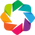

In [179]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import holoviews as hv
import hvplot.pandas

hv.extension('bokeh')

huel_start_date = pd.Timestamp(2024, 9, 5)
end_date = pd.Timestamp(2024, 9, 12)
start_date = huel_start_date - pd.Timedelta(days=30*3) # 3 months before the start of the challenge

def pace_to_td(pace: str):
    min, sec = pace.split(':')

    return pd.Timedelta(minutes=int(min), seconds=int(sec))

def pace_to_kmh(pace: str):
    min, sec = pace.split(':')
    return 60 / (int(min) + int(sec) / 60)

def pace_to_sorta_mpkm(pace: str):
    min, sec = pace.split(':')
    return int(min) + int(sec) / 60


activity= pd.read_csv('huel/activities.csv')
activity = (
    activity
    .loc[lambda x: x['Activity Type'] == 'Running']
    .assign(
        date=lambda x: pd.to_datetime(x['Date']),
        avg_pace=lambda x: x['Avg Pace'].map(pace_to_td),
        avg_pace_kmh=lambda x: x['Avg Pace'].map(pace_to_kmh),
        avg_pace_smpkm=lambda x: x['Avg Pace'].map(pace_to_sorta_mpkm),
        during_challenge = lambda x: x.date >= huel_start_date,
        group=lambda x: x.during_challenge.map({True: 'Huel', False: 'Baseline'}),
        group_jitter=lambda x: x.during_challenge.astype(float) + np.random.normal(0, 0.035, len(x))
    )
    .rename(columns={
        'avg_pace': 'Average Pace (mins/km)',
        'avg_pace_kmh': 'Average Pace (kmh)',
        'avg_pace_smpkm': 'Average Pace (fractional mins/km)',
    })
    .loc[lambda x: x.date >= start_date]
    .loc[lambda x: x.date <= end_date]
    .sort_values('date', )
)

# activity.hvplot(kind='scatter', x='date', y='Average Pace (mins/km)', by='group', cmap='viridis', title='Running Pace Over Time').opts(legend_position='top_left')

fig = px.box(activity, x='group', y='Average Pace (fractional mins/km)', color='group', points='all', title='Average Pace')


def fig_to_html(fig, name):
    fig.update_layout(showlegend=False)
    with open(f'../public/iframes/huel_{name}.html', 'w') as f:
        f.write(fig.to_html())

fig_to_html(fig, 'avg_pace')

fig 

In [135]:
# activity.hvplot(kind='box', x='group', by='group', y='Average Pace (kmh)', cmap='viridis', title='Average Pace (km/h)').opts(legend_position='top_left')

In [180]:
# activity.hvplot(kind='box', x='group', by='group', y='Distance', cmap='viridis', title='Distance run').opts(legend_position='top_left')

fig = px.box(activity, x='group', y='Distance', color='group', points='all', title='Average Distance (kilometers)')

fig_to_html(fig, 'avg_dist')

fig

In [181]:
# activity.hvplot(kind='box', x='group', by='group', y='Avg HR', cmap='viridis', title='Average Heart Rate During Exercise').opts(legend_position='top_left')
px.box(activity, x='group', y='Avg HR', color='group', points='all', title='Average Heart Rate During Exercise')

In [182]:
sleep = (
    pd.read_csv('huel/sleep.csv')
    .assign(
        date=lambda x: pd.to_datetime(x['Sleep Score 4 Weeks'] + ' 2024'),
        during_challenge = lambda x: x.date >= huel_start_date,

        group=lambda x: x.during_challenge.map({True: 'Huel', False: 'Baseline'}),
    )
    .sort_values('date')
)


In [183]:
sleep

,Sleep Score 4 Weeks,Score,Resting Heart Rate,Body Battery,Pulse Ox,Respiration,HRV Status,Quality,Duration,Bedtime,Wake Time,date,during_challenge,group
27,15 Aug,66,53,68,--,13,54,Fair,7h 40min,23:14,7:39,2024-08-15,False,Baseline
26,16 Aug,41,56,28,--,14,52,Poor,5h 51min,2:19,8:46,2024-08-16,False,Baseline
25,17 Aug,85,50,87,--,12,54,Good,9h 14min,0:32,10:00,2024-08-17,False,Baseline
24,18 Aug,92,48,68,--,12,56,Excellent,8h 37min,0:19,8:57,2024-08-18,False,Baseline
23,19 Aug,75,49,--,--,13,56,Fair,7h 43min,23:24,7:31,2024-08-19,False,Baseline
22,20 Aug,81,51,72,--,13,55,Good,7h 45min,23:22,7:26,2024-08-20,False,Baseline
21,21 Aug,83,51,71,--,12,56,Good,7h 23min,0:52,8:21,2024-08-21,False,Baseline
20,22 Aug,73,50,73,--,13,57,Fair,8h 9min,23:29,8:17,2024-08-22,False,Baseline
19,23 Aug,84,50,--,--,12,61,Good,6h 54min,0:40,7:55,2024-08-23,False,Baseline
18,24 Aug,70,51,57,--,13,60,Fair,7h 48min,23:55,8:31,2024-08-24,False,Baseline


In [184]:
# sleep.hvplot(kind='box', x='group', by='group', y='Score', cmap='viridis', title='Average Sleep Score')
fig = px.box(sleep, x='group', y='Score', color='group', points='all', title='Average Sleep Score')

fig_to_html(fig, 'sleep')
fig

In [186]:
# This is 'body battery charge during sleep' - i don't care about this measure, i thought it was just body battery
 
# def tryfloat(x):
#     try:
#         return float(x)
#     except ValueError:
#         return float('nan')

# sleep['Body Battery'] = sleep['Body Battery'].map(tryfloat)

# fig = px.box(sleep, x='group', y='Body Battery', color='group', points='all', title='Average Body Battery')

# fig_to_html(fig, 'bb')
# fig

# Load up data from Garmin export

In [232]:
from pathlib import Path

folder = Path('/Users/george/Downloads/fcf1aca2-53f6-4c22-a772-020c3a72b296_1/DI_CONNECT/DI-Connect-Aggregator/')

folder.exists()
files = folder.glob('UDSFile_*.json')


uds = []
for file in files:
    uds.append(pd.read_json(file))

uds = pd.concat(uds)
uds.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1661 entries, 0 to 98
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   userProfilePK                         1661 non-null   int64  
 1   calendarDate                          1661 non-null   object 
 2   uuid                                  1661 non-null   object 
 3   durationInMilliseconds                1661 non-null   int64  
 4   totalKilocalories                     1661 non-null   int64  
 5   activeKilocalories                    1661 non-null   int64  
 6   bmrKilocalories                       1661 non-null   int64  
 7   wellnessKilocalories                  1661 non-null   int64  
 8   remainingKilocalories                 1661 non-null   int64  
 9   wellnessTotalKilocalories             1661 non-null   int64  
 10  wellnessActiveKilocalories            1661 non-null   int64  
 11  totalSteps              

In [245]:
# # pd.DataFrame()
# bb.bodyBatteryStatList.tolist()
bb = uds['bodyBattery'].str['bodyBatteryStatList'].tolist()

# Flatten the list of lists
flat = []
for sublist in bb:
    if isinstance(sublist, float):
        continue
    for item in sublist:
        flat.append(item)
bb = (
    pd.DataFrame(flat).rename(columns={'statsValue': 'Body Battery'})
    .assign(statTimestamp=lambda x: pd.to_datetime(x.statTimestamp),
           during_challenge = lambda x: x.statTimestamp >= huel_start_date,
              group=lambda x: x.during_challenge.map({True: 'Huel', False: 'Baseline'}), 
            )
    .loc[lambda x: x.statTimestamp >= start_date]
    .loc[lambda x: x.statTimestamp <= end_date]

)

# Daily high 
bb_high = (
    bb

    .loc[lambda x: x.bodyBatteryStatType == 'HIGHEST']

    # .plot(x='statTimestamp', y='statsValue')
    # .pipe(sns.boxplot, x='group', y='statsValue')
)
fig = px.box(bb_high, x='group', y='Body Battery', color='group', points='all', title='Daily High Body Battery')

fig_to_html(fig, 'bb_high')
fig

In [236]:
sublist

nan